#### Airlines Data Forecasting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("Airlines+Data.xlsx")

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.shape

(96, 2)

<AxesSubplot:>

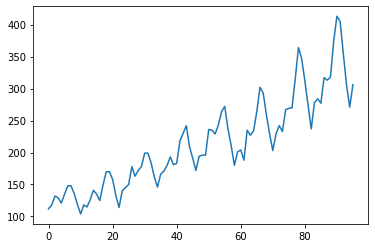

In [5]:
df["Passengers"].plot()

In [6]:
# First-order difference
df['Passengers_Diff'] = df['Passengers'].diff(periods=1)
df

,Month,Passengers,Passengers_Diff
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [7]:
df=df.dropna()

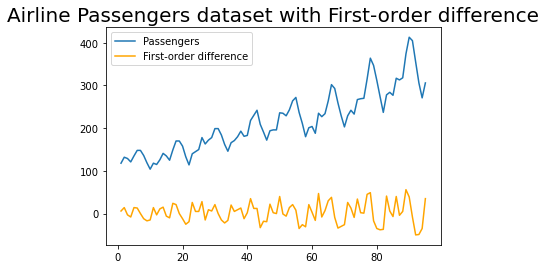

In [8]:
# Plot
plt.title('Airline Passengers dataset with First-order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='First-order difference', color='orange')
plt.legend()

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Calculate Autocorrelation
acf_values = acf(df['Passengers_Diff'])
np.round(acf_values,2)

array([ 1.  ,  0.25, -0.16, -0.19, -0.3 , -0.08,  0.05, -0.11, -0.29,
       -0.13, -0.14,  0.23,  0.77,  0.2 , -0.15, -0.14, -0.23, -0.03,
        0.01, -0.09])

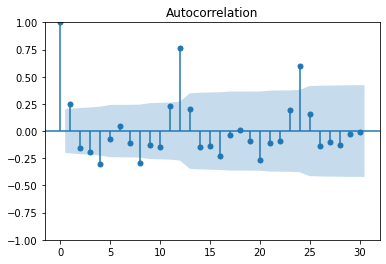

In [10]:
#Plot ACF

plot_acf(df['Passengers_Diff'], lags=30);

In [11]:
#Calculate PACF

pacf_values = pacf(df['Passengers_Diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.25, -0.24, -0.1 , -0.3 ,  0.02, -0.08, -0.25, -0.45,
       -0.22, -0.65, -0.37,  0.59, -0.12, -0.28,  0.26,  0.  , -0.1 ,
       -0.29,  0.39])

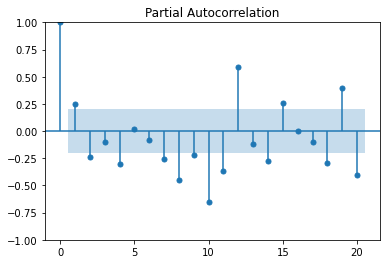

In [12]:
#Plot PACF

plot_pacf(df['Passengers_Diff']);

In [13]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")

df

,Month,Passengers,Passengers_Diff,Date
1,1995-02-01,118,6.0,1995-02-01
2,1995-03-01,132,14.0,1995-03-01
3,1995-04-01,129,-3.0,1995-04-01
4,1995-05-01,121,-8.0,1995-05-01
5,1995-06-01,135,14.0,1995-06-01
...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01
92,2002-09-01,355,-50.0,2002-09-01
93,2002-10-01,306,-49.0,2002-10-01
94,2002-11-01,271,-35.0,2002-11-01


In [14]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df

,Month,Passengers,Passengers_Diff,Date,month,year
1,1995-02-01,118,6.0,1995-02-01,Feb,1995
2,1995-03-01,132,14.0,1995-03-01,Mar,1995
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995
4,1995-05-01,121,-8.0,1995-05-01,May,1995
5,1995-06-01,135,14.0,1995-06-01,Jun,1995
...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002


In [15]:
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,month_dummies],axis = 1)

In [16]:
df

,Month,Passengers,Passengers_Diff,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,1995-02-01,118,6.0,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,14.0,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,-8.0,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,14.0,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df["t"] = np.arange(1,96)

In [18]:
df

,Month,Passengers,Passengers_Diff,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
1,1995-02-01,118,6.0,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1995-03-01,132,14.0,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3
4,1995-05-01,121,-8.0,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4
5,1995-06-01,135,14.0,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,91
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,92
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,93
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,94


In [19]:
df["t_squared"] = df["t"]*df["t"]
df

,Month,Passengers,Passengers_Diff,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
1,1995-02-01,118,6.0,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,1995-03-01,132,14.0,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9
4,1995-05-01,121,-8.0,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16
5,1995-06-01,135,14.0,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836


In [20]:
df["log_Passengers"] = np.log(df["Passengers"])

In [21]:
df

,Month,Passengers,Passengers_Diff,Date,month,year,Apr,Aug,Dec,Feb,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
1,1995-02-01,118,6.0,1995-02-01,Feb,1995,0,0,0,1,...,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,14.0,1995-03-01,Mar,1995,0,0,0,0,...,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995,1,0,0,0,...,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,-8.0,1995-05-01,May,1995,0,0,0,0,...,0,0,0,1,0,0,0,4,16,4.795791
5,1995-06-01,135,14.0,1995-06-01,Jun,1995,0,0,0,0,...,0,1,0,0,0,0,0,5,25,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002,0,1,0,0,...,0,0,0,0,0,0,0,91,8281,6.003887
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002,0,0,0,0,...,0,0,0,0,0,0,1,92,8464,5.872118
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002,0,0,0,0,...,0,0,0,0,0,1,0,93,8649,5.723585
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002,0,0,0,0,...,0,0,0,0,1,0,0,94,8836,5.602119


In [22]:
df=df.drop("Passengers_Diff",axis=1)
df

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5,25,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.602119


In [23]:
Train = df.head(77)
Test = df.tail(19)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
df.head(1)

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685


In [26]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

56.298129853954634

In [27]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

316.8373138860374

In [28]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

53.772235827472706

In [29]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

131.05407591501918

In [30]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

36.15683302982735

In [31]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_sea))
rmse_Mult_sea

131.05407591501918

In [32]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

316.80655646722835

In [33]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,36.156833
2,rmse_Quad,53.772236
0,rmse_linear,56.298130
3,rmse_add_sea,131.054076
5,rmse_Mult_sea,131.054076
6,rmse_Mult_add_sea,316.806556
1,rmse_Exp,316.837314


## Arima Model (Data based Model)

In [34]:
df_arima= pd.read_excel("Airlines+Data.xlsx",index_col='Month',parse_dates=True)
df_arima

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [36]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [37]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("P-Value : ", dftest[1])
    
    
ad_test(df['Passengers'])

P-Value :  0.9967724879165373


In [38]:
stepwise_fit = auto_arima(df['Passengers'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=863.181, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=859.210, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=855.722, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=861.867, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=854.174, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=853.773, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=852.670, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=854.211, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=847.960, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=852.766, Time=0.04 sec
 A

In [39]:
df_arima.shape

(96, 1)

In [40]:
#Split the data
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(65, 20) (30, 20)


In [41]:
model = ARIMA(train['Passengers'],order=(3,1,2))
model=model.fit()
model.summary()

C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   65
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -272.143
Date:                Sun, 12 Feb 2023   AIC                            556.285
Time:                        16:12:21   BIC                            569.239
Sample:                             0   HQIC                           561.388
                                 - 65                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0030      0.217      0.014      0.989      -0.423       0.429
ar.L2          0.4522      0.245      1.843      0.065      -0.029       0.933
ar.L3         -0.1569      0.205     -0.765      0.444      -0.559       0.245
ma.L1          0.0954      0.214      0.446      0.655      -0.324       0.514
ma.L2         -0.7654      0.180     -4.252      0.000      -1.118      -0.413
sigma2       286.3512     66.084      4.333      0.000     156.829     415.873
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.57   Prob(JB):                         0.46
Heteroskedasticity (H):               2.95   Skew:                             0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

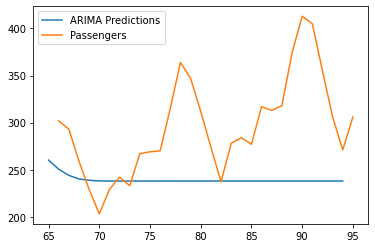

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Passengers'].plot(legend=True)

In [44]:
from math import sqrt
test['Passengers'].mean()
rmse_arima=sqrt(mean_squared_error(pred,test['Passengers']))
print(rmse_arima)

75.97758019395292


In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","rmse_arima"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,36.156833
2,rmse_Quad,53.772236
0,rmse_linear,56.298130
7,rmse_arima,75.977580
3,rmse_add_sea,131.054076
5,rmse_Mult_sea,131.054076
6,rmse_Mult_add_sea,316.806556
1,rmse_Exp,316.837314


### Additive Seasonality Quadratic Has The lowest Rmse ..So Additive Seasonality Quadratic Model Should be selected

